In [3]:
import pandas as pd



In [6]:
# Charger les données
df = pd.read_csv("train.csv")
df


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [7]:
# Forme du Dataframe
print("Forme du Dataframe :", df.shape)


Forme du Dataframe : (7613, 5)


In [8]:
# Valeurs manquantes
print("Valeurs manquantes :\n", df.isnull().sum())

# Duplicatas
print("Duplicatas :", df.duplicated().sum())


Valeurs manquantes :
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64
Duplicatas : 0


In [10]:
# Colonnes pertinentes
columns_of_interest = ['text', 'target']  
df = df[columns_of_interest]
df


,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [11]:
# Statistiques descriptives pour les données textuelles
print(df['text'].describe())


count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object


In [13]:
# Distribution des longueurs de texte
df['text_length'] = df['text'].apply(len)
df['text_length']


0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text_length, Length: 7613, dtype: int64

In [14]:
# Calcul du ratio
ratio_catastrophe_tweets = df['target'].value_counts(normalize=True)[1]
print("Ratio de tweets sur les catastrophes :", ratio_catastrophe_tweets)


Ratio de tweets sur les catastrophes : 0.4296597924602653


In [15]:
# Exemples de tweets aléatoires
random_tweets = df.sample(5)
print("Quelques tweets aléatoires :\n", random_tweets)


Quelques tweets aléatoires :
                                                    text  target  text_length
6931  The worst  voice I can ever hear is the 'Nikki...       0           81
4204  Precious cargo onesie recalled for choking haz...       0           73
4879  UK police link Tunisian beach massacre with Ba...       1           86
5186  air sunrays obliterated on its hairy head like...       0           69
7481  the sunset boys wreck my bed   original 1979 u...       1          126


In [34]:
# Afficher le texte des tweets aléatoires
print("Texte des tweets aléatoires :\n", df.loc[random_tweets.index, 'text'])



Texte des tweets aléatoires :
 6931    The worst  voice I can ever hear is the 'Nikki...
4204    Precious cargo onesie recalled for choking haz...
4879    UK police link Tunisian beach massacre with Ba...
5186    air sunrays obliterated on its hairy head like...
7481    the sunset boys wreck my bed   original 1979 u...
Name: text, dtype: object


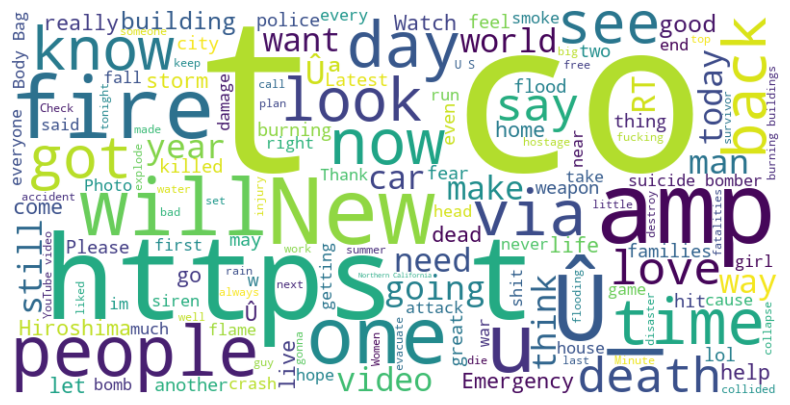

In [16]:
# Utiliser un WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(' '.join(df['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


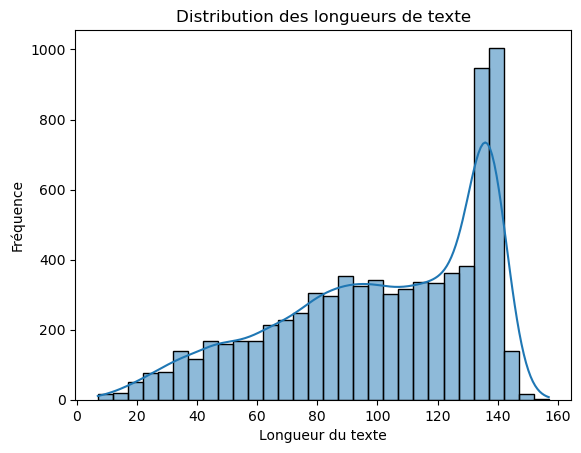

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution des longueurs de texte
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution des longueurs de texte')
plt.xlabel('Longueur du texte')
plt.ylabel('Fréquence')
plt.show()


PARTI 2:  Text Processing 

In [18]:

import spacy
from spacy.lang.en import English
from spacy.tokenizer import Tokenizer
from spacy.lang.en.stop_words import STOP_WORDS




In [19]:
# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Add custom stopwords
custom_stopwords = set(["custom", "stopwords", "list"])  # Add your custom stopwords
STOP_WORDS = STOP_WORDS.union(custom_stopwords)



In [20]:
# Function for text processing with spaCy
def preprocess_text_spacy(text):
    doc = nlp(text)
    
    # Tokenization, lemmatization, and removing stopwords and short tokens
    tokens = [token.lemma_.lower() for token in doc if token.text.lower() not in STOP_WORDS and len(token.text) > 2]
    
    return ' '.join(tokens)



In [23]:
# Apply the function to the 'text' column
df['processed_text_spacy'] = df['text'].apply(preprocess_text_spacy)
df['processed_text_spacy']




0                    deed reason earthquake allah forgive
1                      forest fire near ronge sask canada
2       resident ask shelter place notify officer evac...
3       13,000 people receive wildfire evacuation orde...
4       get send photo ruby alaska smoke wildfire pour...
                              ...                        
7608    giant crane hold bridge collapse nearby home h...
7609    @aria_ahrary @thetawniest control wild fire ca...
7610    m1.94 01:04 utc]?5 volcano hawaii http://t.co/...
7611    police investigate bike collide car little por...
7612    late home raze northern california wildfire ab...
Name: processed_text_spacy, Length: 7613, dtype: object

In [25]:
# Reconstruct the corpus
corpus_spacy = ' '.join(df['processed_text_spacy'])
corpus_spacy



"deed reason earthquake allah forgive forest fire near ronge sask canada resident ask shelter place notify officer evacuation shelter place order expect 13,000 people receive wildfire evacuation order california get send photo ruby alaska smoke wildfire pour school rockyfire update california hwy close direction lake county fire cafire wildfire flood disaster heavy rain cause flash flooding street manitou colorado springs area hill fire wood ... emergency evacuation happen building street afraid tornado come area ... people die heat wave far haha south tampa getting flood hah- wait second live south tampa gonna gonna fvck flood rain flood florida tampabay tampa day lose count flood bago myanmar arrive bago damage school bus multi car crash breaking man love fruit summer lovely car fast goooooooaaaaaal ridiculous .... london cool love skiing wonderful day looooool way ... eat shit nyc week love girlfriend cooool like pasta end @bbcmtd wholesale markets ablaze http://t.co/lhyxeohy6c try 

In [26]:
# Number of unique tokens
unique_tokens_spacy = len(set(corpus_spacy.split()))
print("Nombre de tokens uniques avec spaCy :", unique_tokens_spacy)



Nombre de tokens uniques avec spaCy : 20288


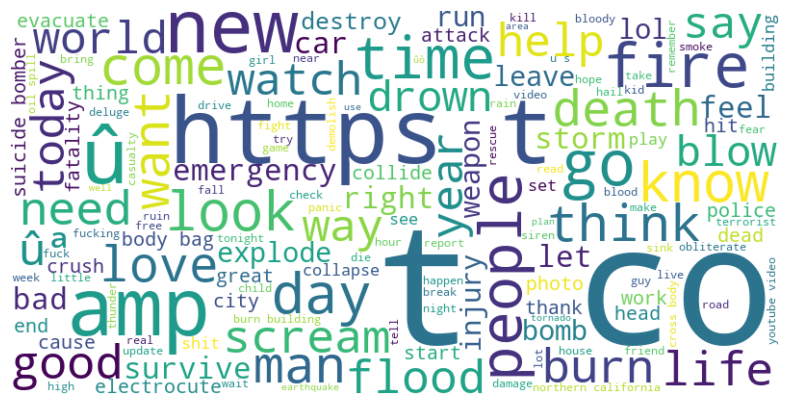

In [27]:
# Visualize the most frequent tokens with a WordCloud
wordcloud_spacy = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(corpus_spacy)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spacy, interpolation='bilinear')
plt.axis('off')
plt.show()



In [29]:
# Use the processed column with spaCy
df['new_text_spacy'] = df['processed_text_spacy']
df['new_text_spacy']


0                    deed reason earthquake allah forgive
1                      forest fire near ronge sask canada
2       resident ask shelter place notify officer evac...
3       13,000 people receive wildfire evacuation orde...
4       get send photo ruby alaska smoke wildfire pour...
                              ...                        
7608    giant crane hold bridge collapse nearby home h...
7609    @aria_ahrary @thetawniest control wild fire ca...
7610    m1.94 01:04 utc]?5 volcano hawaii http://t.co/...
7611    police investigate bike collide car little por...
7612    late home raze northern california wildfire ab...
Name: new_text_spacy, Length: 7613, dtype: object